In [1]:
import numpy as np
from pathlib import Path
import networkx as nx
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
import pandas as pd

def read_net_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    nodes = {}
    n_states = 0
    create = True
    
    for line in lines:
        if line.strip() and not line.startswith('*'):  # Ignora le righe vuote e i commenti
            parts = line.strip().split()
            if len(parts) == 5:
                nodes[int(parts[0])-1] = [parts[1].replace('"', ''), float(parts[2]), float(parts[3])]
                n_states += 1
            elif len(parts) == 3:
                if create:
                    matrix = [[0 for _ in range(n_states)] for _ in range(n_states)]
                    create = False
                matrix[int(parts[0])-1][int(parts[1])-1] = float(parts[2])

    return nodes, matrix

In [2]:
dataset_folder = Path.cwd().joinpath("datasets")
data2000 = dataset_folder.joinpath("2000.net")
data2005 = dataset_folder.joinpath("2005.net")
data2010 = dataset_folder.joinpath("2010.net")
data2015 = dataset_folder.joinpath("2015.net")
data2018 = dataset_folder.joinpath("2018.net")

nodes, m2000 = read_net_file(data2000)
_, m2005 = read_net_file(data2005)
_, m2010 = read_net_file(data2010)
_, m2015 = read_net_file(data2015)
_, m2018 = read_net_file(data2018)

In [3]:
G2000 = nx.DiGraph()
G2005 = nx.DiGraph()
G2010 = nx.DiGraph()
G2015 = nx.DiGraph()
G2018 = nx.DiGraph()

for r in range(len(m2000)):
  for c in range(len(m2000[r])):
    if m2000[r][c]>0:
      G2000.add_edge(nodes[r][0], nodes[c][0], price=m2000[r][c])

for r in range(len(m2005)):
  for c in range(len(m2005[r])):
    if m2005[r][c]>0:
      G2005.add_edge(nodes[r][0], nodes[c][0], price=m2005[r][c])

for r in range(len(m2010)):
  for c in range(len(m2010[r])):
    if m2010[r][c]>0:
      G2010.add_edge(nodes[r][0], nodes[c][0], price=m2010[r][c])

for r in range(len(m2015)):
  for c in range(len(m2015[r])):
    if m2015[r][c]>0:
      G2015.add_edge(nodes[r][0], nodes[c][0], price=m2015[r][c])

for r in range(len(m2018)):
  for c in range(len(m2018[r])):
    if m2018[r][c]>0:
      G2018.add_edge(nodes[r][0], nodes[c][0], price=m2018[r][c])
print(G2000)
print(G2005)
print(G2010)
print(G2015)
print(G2018)

DiGraph with 161 nodes and 16335 edges
DiGraph with 161 nodes and 17201 edges
DiGraph with 161 nodes and 18579 edges
DiGraph with 161 nodes and 18061 edges
DiGraph with 161 nodes and 17030 edges


In [4]:
Tot2000 = {'Imp':[sum(i) for i in m2000], 'Exp':[sum(m2000[j][i] for j in range(len(m2000))) for i in range(len(m2000))], 'ImpPartners':[sum(1 for e in i if e > 0) for i in m2000], 'ExpPartners':[sum([1 for j in range(len(m2000)) if m2000[j][i] > 0]) for i in range(len(m2000))]}
Tot2005 = {'Imp':[sum(i) for i in m2005], 'Exp':[sum(m2000[j][i] for j in range(len(m2005))) for i in range(len(m2005))], 'ImpPartners':[sum(1 for e in i if e > 0) for i in m2005], 'ExpPartners':[sum([1 for j in range(len(m2005)) if m2005[j][i] > 0]) for i in range(len(m2005))]}
Tot2010 = {'Imp':[sum(i) for i in m2010], 'Exp':[sum(m2000[j][i] for j in range(len(m2010))) for i in range(len(m2010))], 'ImpPartners':[sum(1 for e in i if e > 0) for i in m2010], 'ExpPartners':[sum([1 for j in range(len(m2010)) if m2010[j][i] > 0]) for i in range(len(m2010))]}
Tot2015 = {'Imp':[sum(i) for i in m2015], 'Exp':[sum(m2000[j][i] for j in range(len(m2015))) for i in range(len(m2015))], 'ImpPartners':[sum(1 for e in i if e > 0) for i in m2015], 'ExpPartners':[sum([1 for j in range(len(m2015)) if m2015[j][i] > 0]) for i in range(len(m2015))]}
Tot2018 = {'Imp':[sum(i) for i in m2018], 'Exp':[sum(m2000[j][i] for j in range(len(m2018))) for i in range(len(m2018))], 'ImpPartners':[sum(1 for e in i if e > 0) for i in m2018], 'ExpPartners':[sum([1 for j in range(len(m2018)) if m2018[j][i] > 0]) for i in range(len(m2018))]}

threshold = 1.0

G2000lite = nx.DiGraph()
G2005lite = nx.DiGraph()
G2010lite = nx.DiGraph()
G2015lite = nx.DiGraph()
G2018lite = nx.DiGraph()

for r in range(len(m2000)):
  for c in range(len(m2000[r])):
    if (m2000[r][c]>0) and ((m2000[r][c]>threshold*Tot2000['Imp'][r]/Tot2000['ImpPartners'][r]) or (m2000[r][c]>threshold*Tot2000['Exp'][c]/Tot2000['ExpPartners'][c])):
      G2000lite.add_edge(nodes[r][0], nodes[c][0], price=m2000[r][c])

for r in range(len(m2005)):
  for c in range(len(m2005[r])):
    if (m2005[r][c]>0) and (m2005[r][c]>threshold*Tot2005['Imp'][r]/Tot2005['ImpPartners'][r]) or (m2005[r][c]>threshold*Tot2005['Exp'][c]/Tot2005['ExpPartners'][c]):
      G2005lite.add_edge(nodes[r][0], nodes[c][0], price=m2005[r][c])

for r in range(len(m2010)):
  for c in range(len(m2010[r])):
    if (m2010[r][c]>0) and (m2010[r][c]>threshold*Tot2010['Imp'][r]/Tot2010['ImpPartners'][r]) or (m2010[r][c]>threshold*Tot2010['Exp'][c]/Tot2010['ExpPartners'][c]):
      G2010lite.add_edge(nodes[r][0], nodes[c][0], price=m2010[r][c])

for r in range(len(m2015)):
  for c in range(len(m2015[r])):
    if (m2015[r][c]>0) and (m2015[r][c]>threshold*Tot2015['Imp'][r]/Tot2015['ImpPartners'][r]) or (m2015[r][c]>threshold*Tot2015['Exp'][c]/Tot2015['ExpPartners'][c]):
      G2015lite.add_edge(nodes[r][0], nodes[c][0], price=m2015[r][c])

for r in range(len(m2018)):
  for c in range(len(m2018[r])):
    if (m2018[r][c]>0) and (m2018[r][c]>threshold*Tot2018['Imp'][r]/Tot2018['ImpPartners'][r]) or (m2018[r][c]>threshold*Tot2018['Exp'][c]/Tot2018['ExpPartners'][c]):
      G2018lite.add_edge(nodes[r][0], nodes[c][0], price=m2018[r][c])

print(G2000lite)
print(G2005lite)
print(G2010lite)
print(G2015lite)
print(G2018lite)

DiGraph with 161 nodes and 4145 edges
DiGraph with 161 nodes and 5008 edges
DiGraph with 161 nodes and 5911 edges
DiGraph with 161 nodes and 5894 edges
DiGraph with 161 nodes and 5830 edges


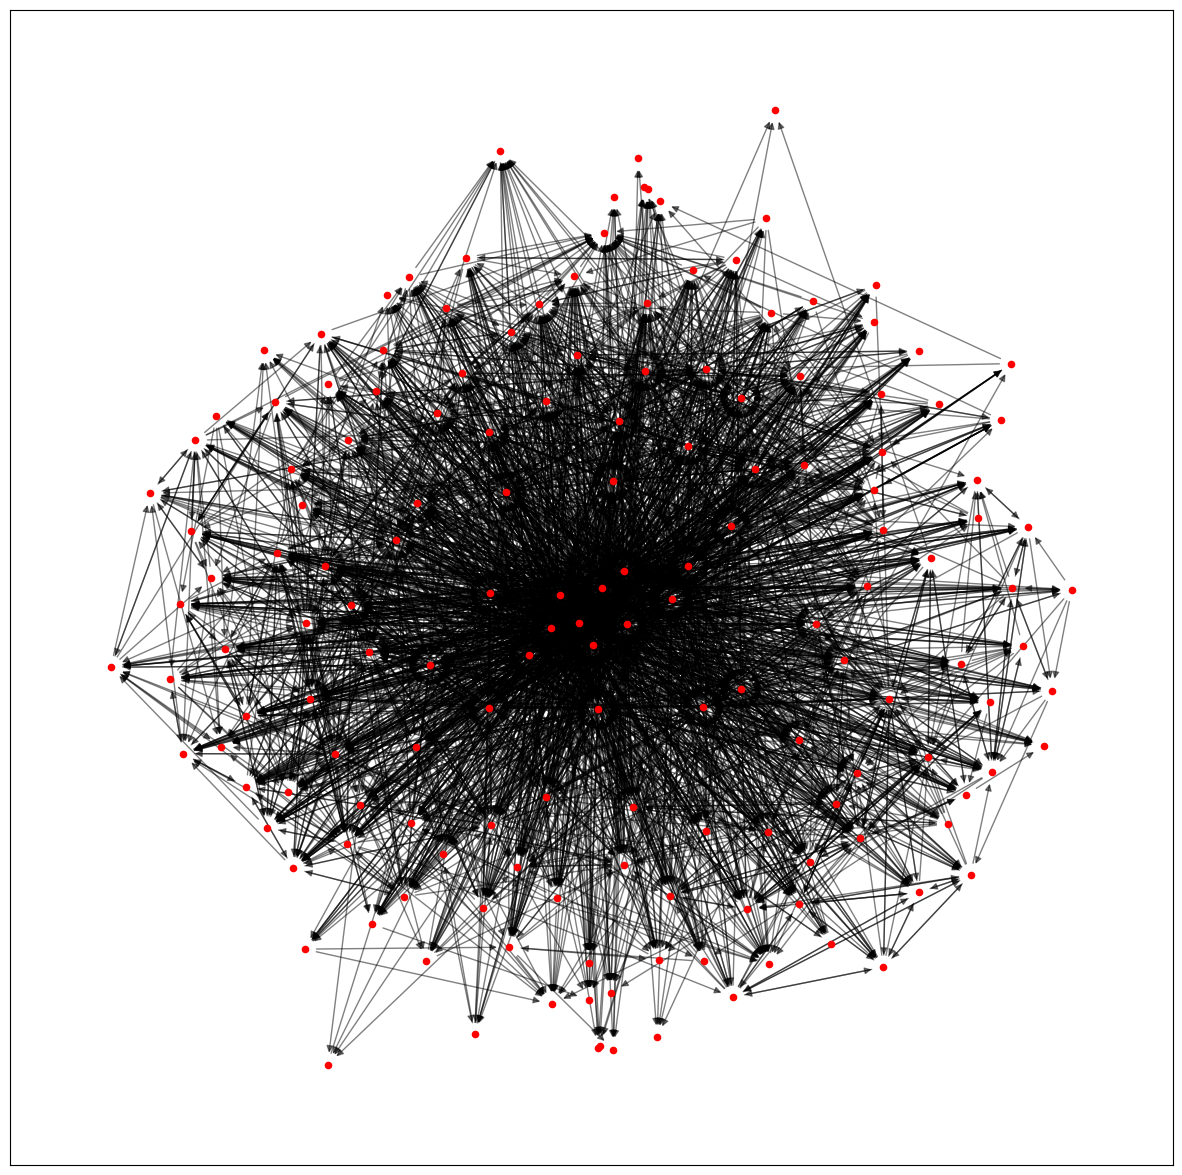

In [5]:
# draw the graph
pos = nx.kamada_kawai_layout(G2000lite)
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G2000lite, pos, node_size=20, node_color='red')
nx.draw_networkx_edges(G2000lite, pos, alpha=0.5)
plt.savefig("netowrk.png")
plt.show()

In [6]:
G2000.edges.data('price')

OutEdgeDataView([('ALB', 'ARE', 1197.07), ('ALB', 'ARG', 162.552), ('ALB', 'ARM', 147.911), ('ALB', 'AUS', 776.949), ('ALB', 'AUT', 11840.4), ('ALB', 'AZE', 7.847), ('ALB', 'BEL', 2936.27), ('ALB', 'BGR', 25911.9), ('ALB', 'BIH', 91.588), ('ALB', 'BLR', 6895.03), ('ALB', 'BOL', 16.033), ('ALB', 'BRA', 1187.76), ('ALB', 'CAF', 0.629), ('ALB', 'CAN', 1463.84), ('ALB', 'CHE', 13422.0), ('ALB', 'CHN', 14696.6), ('ALB', 'CIV', 19.97), ('ALB', 'COL', 1030.44), ('ALB', 'CRI', 46.608), ('ALB', 'CYP', 3181.61), ('ALB', 'CZE', 5927.99), ('ALB', 'DEU', 66369.8), ('ALB', 'DNK', 3831.2), ('ALB', 'ECU', 3130.79), ('ALB', 'EGY', 2126.33), ('ALB', 'ESP', 12677.2), ('ALB', 'EST', 22.94), ('ALB', 'FIN', 5833.02), ('ALB', 'FRA', 14976.9), ('ALB', 'GBR', 8785.13), ('ALB', 'GEO', 183.13), ('ALB', 'GRC', 288023.0), ('ALB', 'HKG', 664.399), ('ALB', 'HRV', 12883.9), ('ALB', 'HTI', 1.097), ('ALB', 'HUN', 10999.9), ('ALB', 'IDN', 44.978), ('ALB', 'IND', 2739.9), ('ALB', 'IRL', 1707.03), ('ALB', 'IRN', 359.091),

In [10]:
node_in =  pd.DataFrame.from_dict(dict(G2000.in_degree()),orient="index", columns=['Imp Deg']).reset_index()
node_out =  pd.DataFrame.from_dict(dict(G2000.out_degree()),orient="index", columns=['Exp Deg']).reset_index()
df_2000 = pd.merge(node_in, node_out, on='index')
df_2000 = df_2000.sort_values(by='index')
df_2000.reset_index(drop=True, inplace=True)
df_2000['Tot Deg'] = df_2000['Imp Deg'] + df_2000['Exp Deg']
df_2000['Import'] = Tot2000['Imp']
df_2000['Export'] = Tot2000['Exp']
node_in =  pd.DataFrame.from_dict(dict(G2005.in_degree()),orient="index", columns=['Imp Deg']).reset_index()
node_out =  pd.DataFrame.from_dict(dict(G2005.out_degree()),orient="index", columns=['Exp Deg']).reset_index()
df_2005 = pd.merge(node_in, node_out, on='index')
df_2005 = df_2005.sort_values(by='index')
df_2005.reset_index(drop=True, inplace=True)
df_2005['Tot Deg'] = df_2005['Imp Deg'] + df_2005['Exp Deg']
df_2005['Import'] = Tot2005['Imp']
df_2005['Export'] = Tot2005['Exp']
node_in =  pd.DataFrame.from_dict(dict(G2010.in_degree()),orient="index", columns=['Imp Deg']).reset_index()
node_out =  pd.DataFrame.from_dict(dict(G2010.out_degree()),orient="index", columns=['Exp Deg']).reset_index()
df_2010 = pd.merge(node_in, node_out, on='index')
df_2010 = df_2010.sort_values(by='index')
df_2010.reset_index(drop=True, inplace=True)
df_2010['Tot Deg'] = df_2010['Imp Deg'] + df_2010['Exp Deg']
df_2010['Import'] = Tot2010['Imp']
df_2010['Export'] = Tot2010['Exp']
node_in =  pd.DataFrame.from_dict(dict(G2015.in_degree()),orient="index", columns=['Imp Deg']).reset_index()
node_out =  pd.DataFrame.from_dict(dict(G2015.out_degree()),orient="index", columns=['Exp Deg']).reset_index()
df_2015 = pd.merge(node_in, node_out, on='index')
df_2015 = df_2015.sort_values(by='index')
df_2015.reset_index(drop=True, inplace=True)
df_2015['Tot Deg'] = df_2015['Imp Deg'] + df_2015['Exp Deg']
df_2015['Import'] = Tot2015['Imp']
df_2015['Export'] = Tot2015['Exp']
node_in =  pd.DataFrame.from_dict(dict(G2018.in_degree()),orient="index", columns=['Imp Deg']).reset_index()
node_out =  pd.DataFrame.from_dict(dict(G2018.out_degree()),orient="index", columns=['Exp Deg']).reset_index()
df_2018 = pd.merge(node_in, node_out, on='index')
df_2018 = df_2018.sort_values(by='index')
df_2018.reset_index(drop=True, inplace=True)
df_2018['Tot Deg'] = df_2018['Imp Deg'] + df_2018['Exp Deg']
df_2018['Import'] = Tot2018['Imp']
df_2018['Export'] = Tot2018['Exp']

df_2000

index  Imp Deg  Exp Deg  Tot Deg        Import        Export
0     AGO       67        0       67  0.000000e+00  7.679389e+06
1     ALB       85       78      163  1.069578e+06  2.898676e+05
2     ARE      131        0      131  0.000000e+00  3.673976e+07
3     ARG      130      133      263  2.442005e+07  2.585098e+07
4     ARM       77       71      148  8.186318e+05  2.608760e+05
..    ...      ...      ...      ...           ...           ...
156   VNM      127      123      250  1.367300e+07  1.354223e+07
157   YEM       80       87      167  2.181239e+06  3.437099e+06
158   ZAF      138      157      295  2.587589e+07  3.154662e+07
159   ZMB       89      111      200  8.673829e+05  5.933704e+05
160   ZWE      110        0      110  0.000000e+00  1.820346e+06

[161 rows x 6 columns]

In [12]:
print(df_2000[df_2000['index']=='CHN'])
print(df_2000[df_2000['index']=='IRL'])
print(m2000[30][1])
print(nodes[30])

   index  Imp Deg  Exp Deg  Tot Deg        Import        Export
30   CHN      140      150      290  1.904363e+08  3.898784e+08
   index  Imp Deg  Exp Deg  Tot Deg        Import        Export
72   IRL      136      157      293  4.760084e+07  7.806021e+07
1.808
['CHN', 0.7894, 0.6992]


In [14]:
param = 'Export'

percentile_99 = np.percentile(df_2000[param], 98)
hub_nodi = df_2000[df_2000[param] >= percentile_99]['index'].tolist()
print('Nodes hub 2000: ', hub_nodi)

percentile_99 = np.percentile(df_2005[param], 98)
hub_nodi = df_2005[df_2005[param] >= percentile_99]['index'].tolist()
print('Nodes hub 2005: ', hub_nodi)

percentile_99 = np.percentile(df_2010[param], 98)
hub_nodi = df_2010[df_2010[param] >= percentile_99]['index'].tolist()
print('Nodes hub 2010: ', hub_nodi)

percentile_99 = np.percentile(df_2015[param], 98)
hub_nodi = df_2015[df_2015[param] >= percentile_99]['index'].tolist()
print('Nodes hub 2015: ', hub_nodi)

percentile_99 = np.percentile(df_2018[param], 98)
hub_nodi = df_2018[df_2018[param] >= percentile_99]['index'].tolist()
print('Nodes hub 2018: ', hub_nodi)

Nodes hub 2000:  ['CHN', 'DEU', 'JPN', 'USA']
Nodes hub 2005:  ['CHN', 'DEU', 'JPN', 'USA']
Nodes hub 2010:  ['CHN', 'DEU', 'JPN', 'USA']
Nodes hub 2015:  ['CHN', 'DEU', 'JPN', 'USA']
Nodes hub 2018:  ['CHN', 'DEU', 'JPN', 'USA']


# Degree Analysis

In [20]:
density = nx.density(G2000)
print('Density 2000: {}'.format(density))
density = nx.density(G2005)
print('Density 2005: {}'.format(density))
density = nx.density(G2010)
print('Density 2010: {}'.format(density))
density = nx.density(G2015)
print('Density 2015: {}'.format(density))
density = nx.density(G2018)
print('Density 2018: {}'.format(density))

Density 2000: 0.6341226708074534
Density 2005: 0.6677406832298136
Density 2010: 0.7212344720496895
Density 2015: 0.7011257763975155
Density 2018: 0.6611024844720497


In [27]:
degree = list(dict(G.degree()).values())
degree[0:20]

[3, 34, 71, 9, 2, 27, 11, 30, 46, 43, 32, 24, 31, 48, 49, 56, 35, 1, 1, 1]

In [28]:
print('Standard deviation: {}'.format(np.std(degree)))
print('Mean: {}'.format(np.mean(degree)))
print('Median: {}'.format(np.median(degree)))
print('Min: {}'.format(np.min(degree)))
print('Max: {}'.format(np.max(degree)))
print('average: {}'.format(np.average(degree)))
print("Assortativity coefficient: " + str(nx.degree_assortativity_coefficient(G)))

Standard deviation: 7.5208675961573
Mean: 3.209362808842653
Median: 1.0
Min: 1
Max: 71
average: 3.209362808842653
Assortativity coefficient: -0.56547939276143


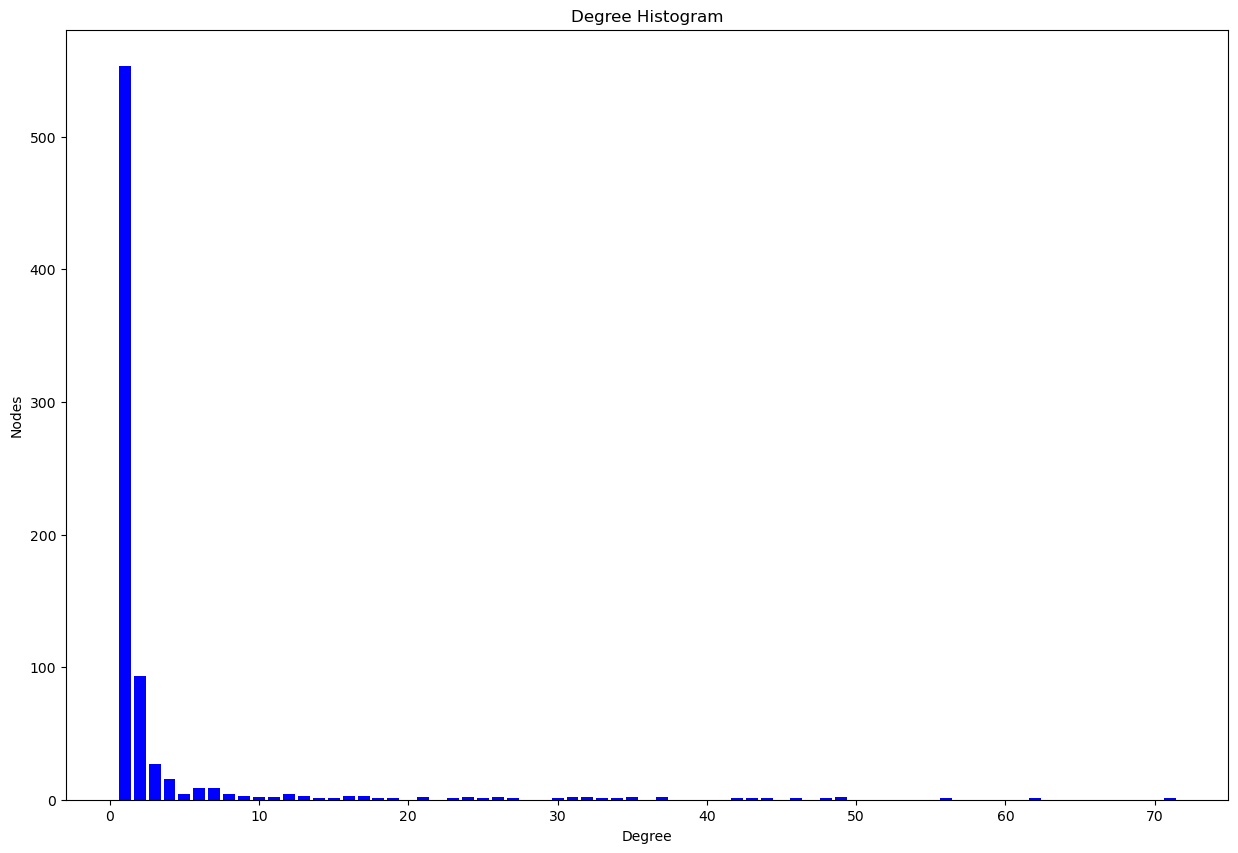

In [29]:
import collections

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
plt.figure(figsize=(15,10))

plt.bar(deg, cnt, width=0.8, color="b")
plt.title("Degree Histogram")
plt.ylabel("Nodes")
plt.xlabel("Degree")

# Save the plot to the graph folder
plt.savefig('graphs/degree_histogram.png')


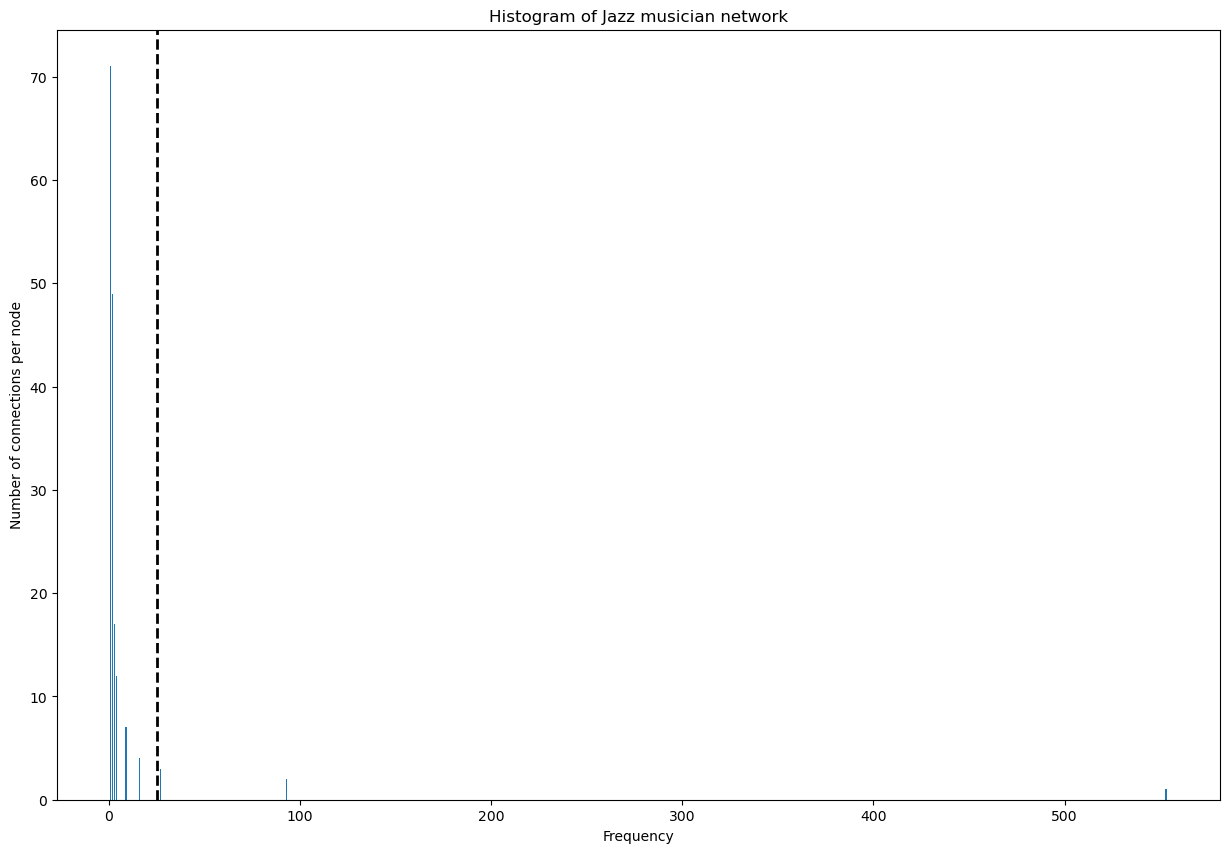

<Figure size 640x480 with 0 Axes>

In [30]:
plt.figure(figsize=(15,10))

plt.bar(x =cnt, height= deg)
plt.axvline(np.array(deg).mean(), color='k', linestyle='dashed', linewidth=2)
plt.title("Histogram of Jazz musician network")
plt.xlabel('Frequency')
plt.ylabel('Number of connections per node')

plt.show()

# Save the plot to the graph folder
plt.savefig('graphs/histogram_of_jazz_musician_network.png')

<Figure size 640x480 with 0 Axes>

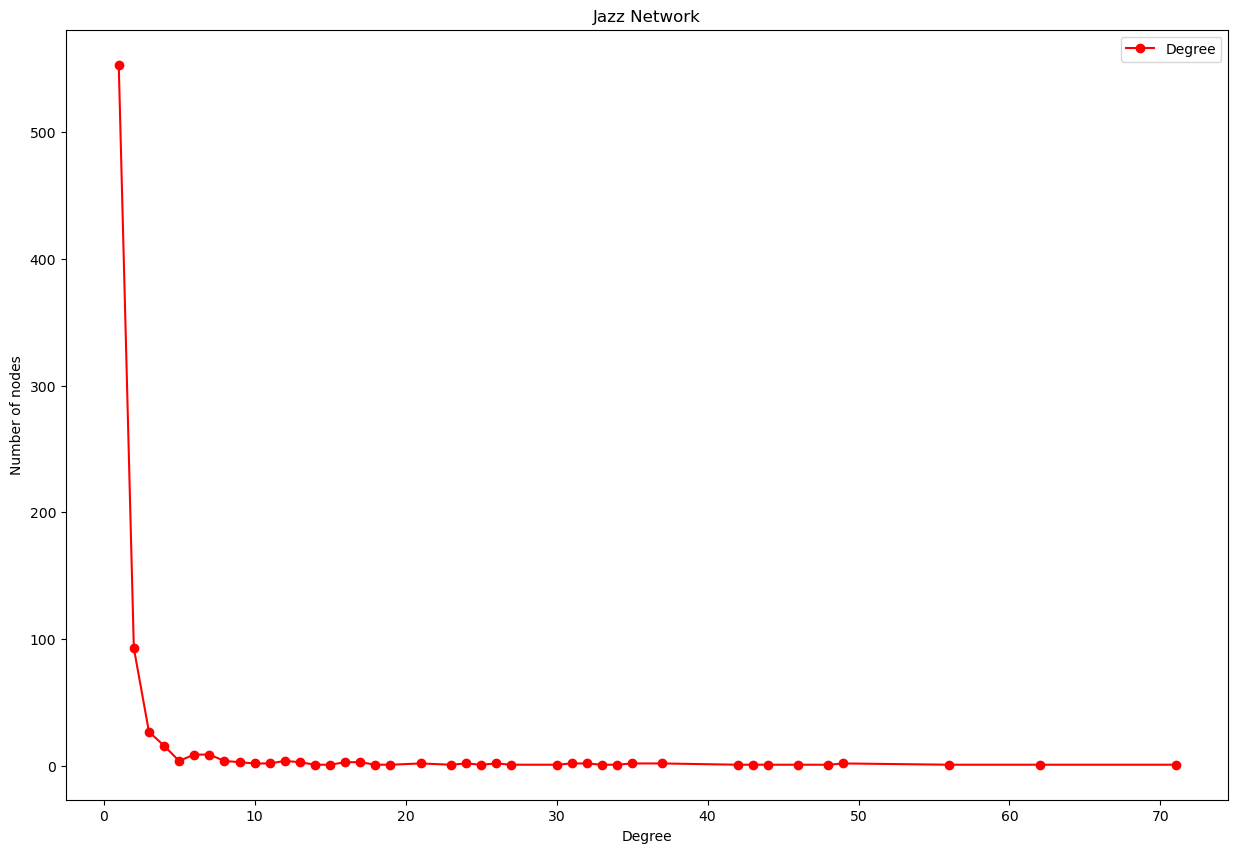

In [31]:
plt.figure()
plt.figure(figsize=(15,10))
plt.plot(deg,cnt,"ro-") # degree
plt.legend(['Degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Jazz Network')

plt.savefig('graphs/jazz_netowrk.png')
plt.show()

<Figure size 640x480 with 0 Axes>

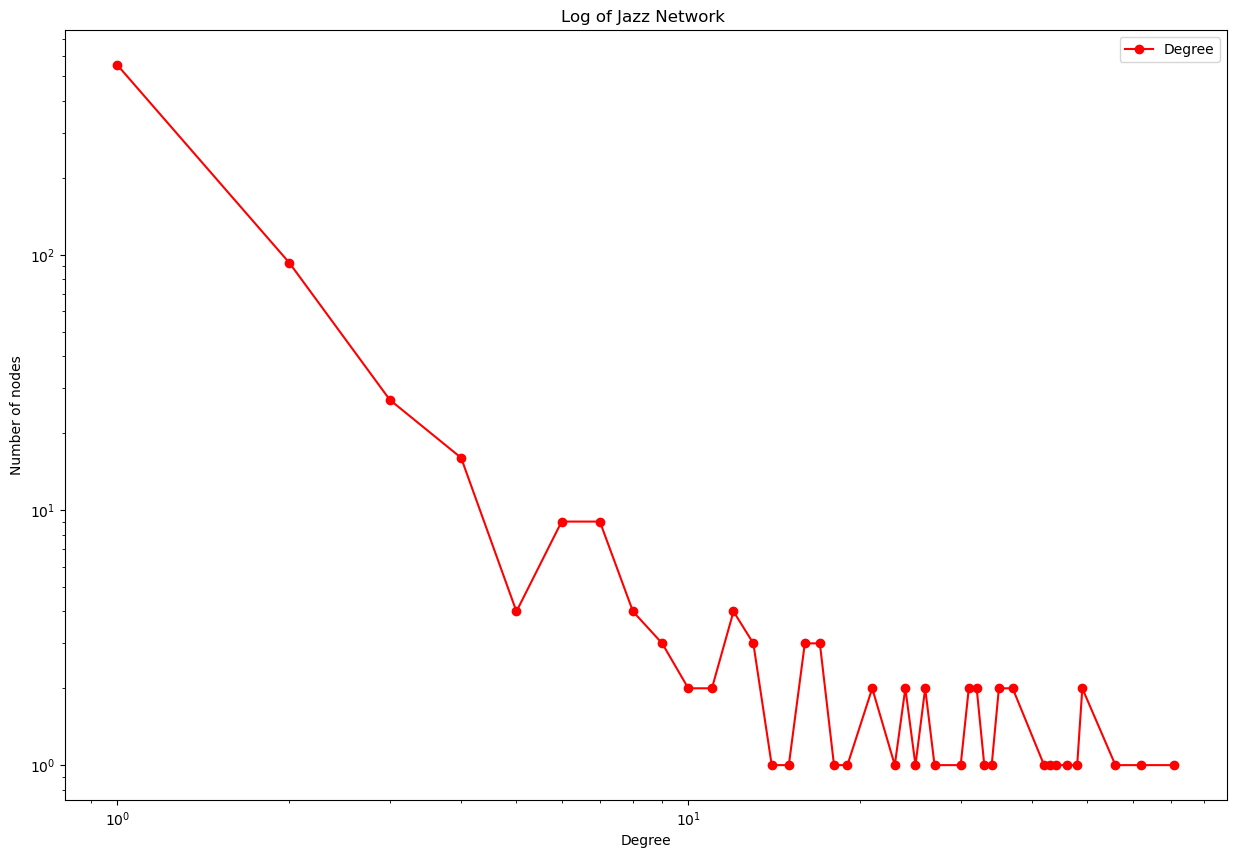

In [32]:
plt.figure()
plt.figure(figsize=(15,10))
plt.loglog(deg,cnt,"ro-") # degree
plt.legend(['Degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Log of Jazz Network ')

plt.savefig('graphs/log_jazz_netowrk.png')
plt.show()


In [33]:
  percentile_99 = np.percentile(degree,99)
  print(percentile_99)

43.319999999999936


In [34]:
hub_nodi = [k for k,v in dict(G.degree()).items() if v>= percentile_99]

In [35]:
print(len(hub_nodi))
print(list(hub_nodi))

8
['Dave Brubeck', 'Buddy DeFranco', 'Red Holloway', 'Roy Eldridge', 'Slide Hampton', 'Roy Haynes', 'Jimmy Owens', 'Abbey Lincoln']


In [36]:
print(list(nx.isolates(G)))

[]


In [37]:
print(nx.is_connected(G))
print(nx.number_connected_components(G))

True
1


In [38]:
len(nx.triangles(G))

769

In [39]:
clusters = nx.average_clustering(G)
clusters

0.02887741136555897

In [40]:
local_clustering=nx.clustering(G)
list_local_clustering=list(local_clustering.values())
print('Mean local clustering: {}'.format(np.mean(list_local_clustering)))


Mean local clustering: 0.028877411365558978


In [41]:
local_cluster = nx.clustering(G)
sorted(local_cluster.items(), key=lambda item: item[1], reverse= False)


[('Alan Dawson', 0),
 ('Bill Berry', 0),
 ('Pharoah Sanders', 0),
 ('David Murray', 0),
 ('B.B. King', 0),
 ('Joe Gordon', 0),
 ('Donald Harrison', 0),
 ('Red Rodney', 0),
 ('Gigi Gryce', 0),
 ('Chet Baker', 0),
 ('Sarah Vaughan', 0),
 ('Earl Hines', 0),
 ('Jay McShann', 0),
 ('Bobby Tucker', 0),
 ('Frank Foster', 0),
 ('Budd Johnson', 0),
 ('Thelonius Monk', 0),
 ('Anne Brown', 0),
 ('Frank Kidd', 0),
 ('Gerald Wiggins', 0),
 ('Tony Williams', 0),
 ('George Seany', 0),
 ('Benny Green', 0),
 ('Ed Thigpen', 0),
 ('Jim Davis', 0),
 ('Johnny Hodges', 0),
 ('Harry Carney', 0),
 ('Andre Previn', 0),
 ('Sam Snead', 0),
 ('Ernie Wilkins', 0),
 ('Joe Newman', 0),
 ('Josh Gibson', 0),
 ('Otto Hardwick', 0),
 ('Bud Powell', 0),
 ('Delfeayo Marsalis', 0),
 ('Nat Pierce', 0),
 ('Archie Shepp', 0),
 ('Tadd Dameron', 0),
 ('Bill Strumpets', 0),
 ('Eric Dolphy', 0),
 ('Charlie Mariano', 0),
 ('Jaki Byard', 0),
 ('Cecil Taylor', 0),
 ('George Butler', 0),
 ('Paul Bley', 0),
 ('Wynton Marsalis', 0),
 (

In [42]:

print("TOTAL number of triangles in the graph: ", sum(list(nx.triangles(G).values())))

TOTAL number of triangles in the graph:  642


# Centrality

In [43]:
import statistics
deg_centr = nx.degree_centrality(G)
sort_orders = sorted(deg_centr.items(), key=lambda x: x[1], reverse=True)
avg_degree_centrality = sum(deg_centr.values()) / len(deg_centr)
print('average of degree centrality: {}'.format(avg_degree_centrality))

degree_centrality_values = list(deg_centr.values())
median_degree_centrality = statistics.median(degree_centrality_values)
print('median of degree centrality: {}'.format(median_degree_centrality))
print('min of degree centrality: {}'.format(sort_orders[-1]))
print('max of degree centrality: {}'.format(sort_orders[0]))

print("10 most important nodes for Degree Centrality:")
for i in range(10):
  print(sort_orders[i])

average of degree centrality: 0.004178857824013956
median of degree centrality: 0.0013020833333333333
min of degree centrality: ('Burt Bacharach', 0.0013020833333333333)
max of degree centrality: ('Dave Brubeck', 0.09244791666666666)
10 most important nodes for Degree Centrality:
('Dave Brubeck', 0.09244791666666666)
('Jimmy Owens', 0.08072916666666666)
('Slide Hampton', 0.07291666666666666)
('Roy Eldridge', 0.06380208333333333)
('Abbey Lincoln', 0.06380208333333333)
('Red Holloway', 0.0625)
('Buddy DeFranco', 0.05989583333333333)
('Roy Haynes', 0.057291666666666664)
('Jimmy Scott', 0.05598958333333333)
('Count Basie', 0.0546875)


In [44]:
betweenesCentrality = nx.betweenness_centrality(G)
sort_orders = sorted(betweenesCentrality.items(), key=lambda x: x[1], reverse=True)

avg_degree_betweenesCentrality = sum(betweenesCentrality.values()) / len(betweenesCentrality)
print('average of bewteenness centrality: {}'.format(avg_degree_betweenesCentrality))
print("10 most important nodes for Betweennes Centrality:")
print('max of betweenes centrality: {}'.format(sort_orders[0]))
for i in range(10):
  print(sort_orders[i])

average of bewteenness centrality: 0.0035570611155097947
10 most important nodes for Betweennes Centrality:
max of betweenes centrality: ('Count Basie', 0.20905657322978083)
('Count Basie', 0.20905657322978083)
('Louis Armstrong', 0.14430915101856542)
('Dave Brubeck', 0.13832170849801675)
('Jimmy Owens', 0.1085768111350452)
('Slide Hampton', 0.09045711526907119)
('Abbey Lincoln', 0.08184291880966488)
('Jimmy Scott', 0.07891014747532835)
('Buddy DeFranco', 0.07724837606193735)
('Red Holloway', 0.07713646375315726)
('Danny Barker', 0.07086591791979385)


In [45]:
eigen = nx.eigenvector_centrality(G)
sort_orders = sorted(eigen.items(), key=lambda x: x[1], reverse=True)

avg_degree_eignCentrality = sum(eigen.values()) / len(eigen)
print('average of eignvector centrality: {}'.format(avg_degree_eignCentrality))
print('max of eigenvector centrality: {}'.format(sort_orders[0]))
print("10 most important nodes for Eigenvector Centrality:")
for i in range(10):
  print(sort_orders[i])

average of eignvector centrality: 0.018944701628495472
max of eigenvector centrality: ('Count Basie', 0.27473324567582535)
10 most important nodes for Eigenvector Centrality:
('Count Basie', 0.27473324567582535)
('Dave Brubeck', 0.23230086928915508)
('Slide Hampton', 0.22783086038122416)
('Roy Eldridge', 0.22545982791950298)
('Lionel Hampton', 0.20165974718297214)
('Jimmy Owens', 0.1989510155549407)
('Louis Armstrong', 0.18614216411377862)
('Duke Ellington', 0.18501446754627995)
('Abbey Lincoln', 0.17219765320498706)
('Dizzy Gillespie', 0.16953924973395293)


In [46]:
pagerank = nx.pagerank(G)
sort_orders = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)


avg_degree_pagerank = sum(pagerank.values()) / len(pagerank)
print('average of pagerank : {}'.format(avg_degree_pagerank))
print('max of pagerank: {}'.format(sort_orders[0]))
print("10 most important nodes for Page Rank:")
for i in range(10):
  print(sort_orders[i])

average of pagerank : 0.001300390117035115
max of pagerank: ('Dave Brubeck', 0.02970198560752293)
10 most important nodes for Page Rank:
('Dave Brubeck', 0.02970198560752293)
('Jimmy Owens', 0.022463845090763452)
('Slide Hampton', 0.019798931381884946)
('Abbey Lincoln', 0.018246701033870945)
('Red Holloway', 0.018191369585127872)
('Jimmy Scott', 0.017557790325311896)
('Buddy DeFranco', 0.01744595519565722)
('Danny Barker', 0.01635176291530461)
('Roy Eldridge', 0.016263260375810003)
('Roy Haynes', 0.015704100159715916)


In [47]:
closeness = nx.closeness_centrality(G)
sort_orders = sorted(closeness.items(), key=lambda x: x[1], reverse=True)

avg_degree_closeness = sum(closeness.values()) / len(closeness)
print('average of closeness : {}'.format(avg_degree_closeness))

print("10 most important nodes for closeness_centrality:")
for i in range(10):
  print(sort_orders[i])

average of closeness : 0.2709530622463782
10 most important nodes for closeness_centrality:
('Count Basie', 0.4501758499413834)
('Louis Armstrong', 0.42761692650334077)
('Lionel Hampton', 0.39772138788192646)
('Slide Hampton', 0.3855421686746988)
('Dave Brubeck', 0.384)
('Duke Ellington', 0.3836163836163836)
('Dizzy Gillespie', 0.37684003925417076)
('Jimmy Owens', 0.37245392822502427)
('Oscar Peterson', 0.3717328170377541)
('Roy Eldridge', 0.3702989392478303)


# Communities

In [48]:
!pip install python-louvain


In [49]:
import networkx.algorithms.community as nx_comm

import community.community_louvain as community_louvain

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

list_community_sets_greedy = list(nx_comm.greedy_modularity_communities(G))
print(list_community_sets_greedy[0:20])

[frozenset({'Maynard Ferguson', 'Charles Davis', 'Pete Candoli', 'Elvin Jones', 'Pat Patrick', 'Jimmy Owens', 'Ron Carter', 'Von Freeman', 'Charles McPherson', 'Don Sebesky', 'Buddy Johnson', 'Wynton Kelly', 'McCoy Tyner', 'Carmell Jones', 'Len Lyons', 'Walter Dyett', 'Clarence Henry', 'J.C. Higginbotham', 'Alice Coltrane', 'Willie Maiden', 'Wes Montgomery', 'Jimmy Nottingham', 'Ben Tucker', 'John Coltrane', 'Mel Lewis', 'Cannonball Adderley', 'Sonny Rollins', 'Hubert Laws', 'Phil Ramone', 'Garnett Brown', 'Eddie Daniels', 'John Gilmore', 'Jimmy Cobb', 'Buddy Bolden', 'Leopold Stokowski', 'Red Garland', 'Hank Mobley', 'Herbie Mann', 'Richard Williams', 'Johnny Gary', 'Jerome Richardson', 'Gerry Mulligan', 'Dennis Mackrel', 'Marshall Brown', 'Lee Morgan', 'Thad Jones', 'Rodney Kendrick', 'Randy Weston', 'Quincy Jones', 'Kenny Dorham', 'Bill Watrous', 'Quincy Troupe', 'Wayne Shorter', 'Antonio Hart', 'Bobby Burgess', 'Dexter Gordon', 'Levi Stubbs', 'Danny Richmond', 'Curtis Porter', 'Ahm

In [50]:
partition_greedy = {}
for i, comm in enumerate(list_community_sets_greedy):
    print("Community:", i)
    print("Number of elems",len(comm))
    for n in comm:
        partition_greedy[n]=i

Community: 0
Number of elems 89
Community: 1
Number of elems 71
Community: 2
Number of elems 61
Community: 3
Number of elems 54
Community: 4
Number of elems 48
Community: 5
Number of elems 39
Community: 6
Number of elems 39
Community: 7
Number of elems 39
Community: 8
Number of elems 38
Community: 9
Number of elems 36
Community: 10
Number of elems 32
Community: 11
Number of elems 30
Community: 12
Number of elems 28
Community: 13
Number of elems 27
Community: 14
Number of elems 25
Community: 15
Number of elems 24
Community: 16
Number of elems 24
Community: 17
Number of elems 23
Community: 18
Number of elems 22
Community: 19
Number of elems 20


In [51]:
print(list(partition_greedy.items())[0:20])

[('Maynard Ferguson', 0), ('Charles Davis', 0), ('Pete Candoli', 0), ('Elvin Jones', 0), ('Pat Patrick', 0), ('Jimmy Owens', 0), ('Ron Carter', 0), ('Von Freeman', 0), ('Charles McPherson', 0), ('Don Sebesky', 0), ('Buddy Johnson', 0), ('Wynton Kelly', 0), ('McCoy Tyner', 0), ('Carmell Jones', 0), ('Len Lyons', 0), ('Walter Dyett', 0), ('Clarence Henry', 0), ('J.C. Higginbotham', 0), ('Alice Coltrane', 0), ('Willie Maiden', 0)]


/var/folders/36/h9ntx1qx07ncdrcnhkyd0cd40000gn/T/ipykernel_6049/514075652.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', max(partition_greedy.values()) + 1)


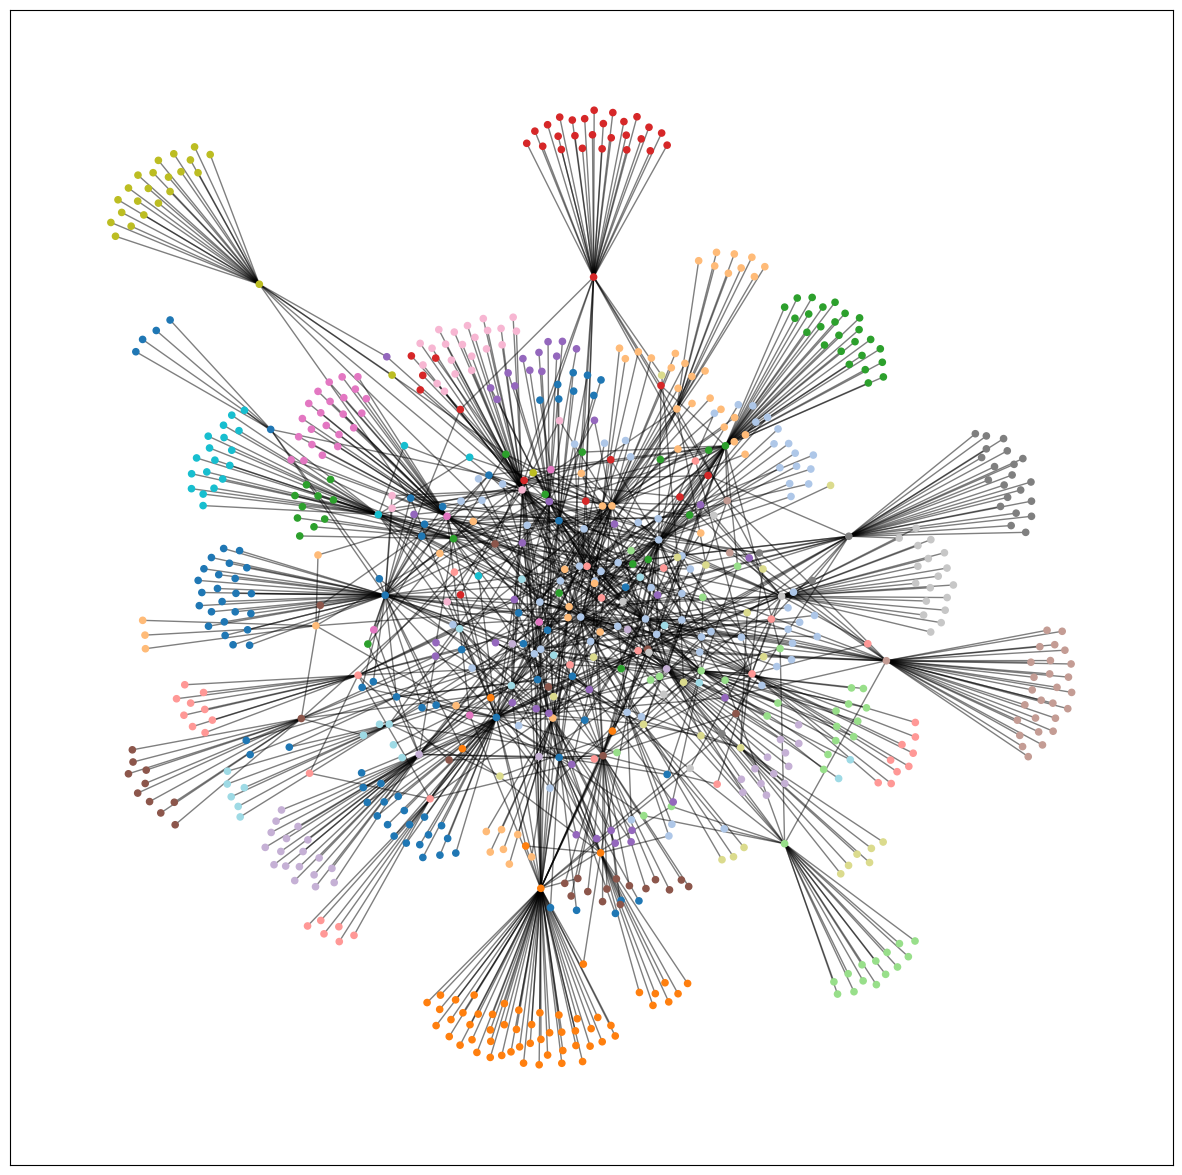

In [52]:
# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('tab20', max(partition_greedy.values()) + 1)
plt.figure(figsize=(15,15))

nx.draw_networkx_nodes(G, pos, partition_greedy.keys(), node_size=20,
                       cmap=cmap, node_color=list(partition_greedy.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)

plt.show()

In [53]:
partition_library = community_louvain.best_partition(G)

In [54]:
print(list(partition_library.items())[0:20])


[('Alan Dawson', 0), ('Sam Rivers', 1), ('Dave Brubeck', 2), ('Bill Berry', 0), ('Pharoah Sanders', 3), ('David Murray', 3), ('Charlie Parker', 1), ('Charles Davis', 15), ('Buddy DeFranco', 7), ('Jimmy Scott', 0), ('Doc Cheatham', 13), ('Billy Eckstine', 1), ('Benny Powell', 1), ('Red Holloway', 10), ('Roy Eldridge', 8), ('Slide Hampton', 12), ('Roswell Rudd', 4), ('B.B. King', 1), ('Joe Gordon', 1), ('Donald Harrison', 1)]


/var/folders/36/h9ntx1qx07ncdrcnhkyd0cd40000gn/T/ipykernel_6049/1438585018.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', max(partition_library.values()) + 1)


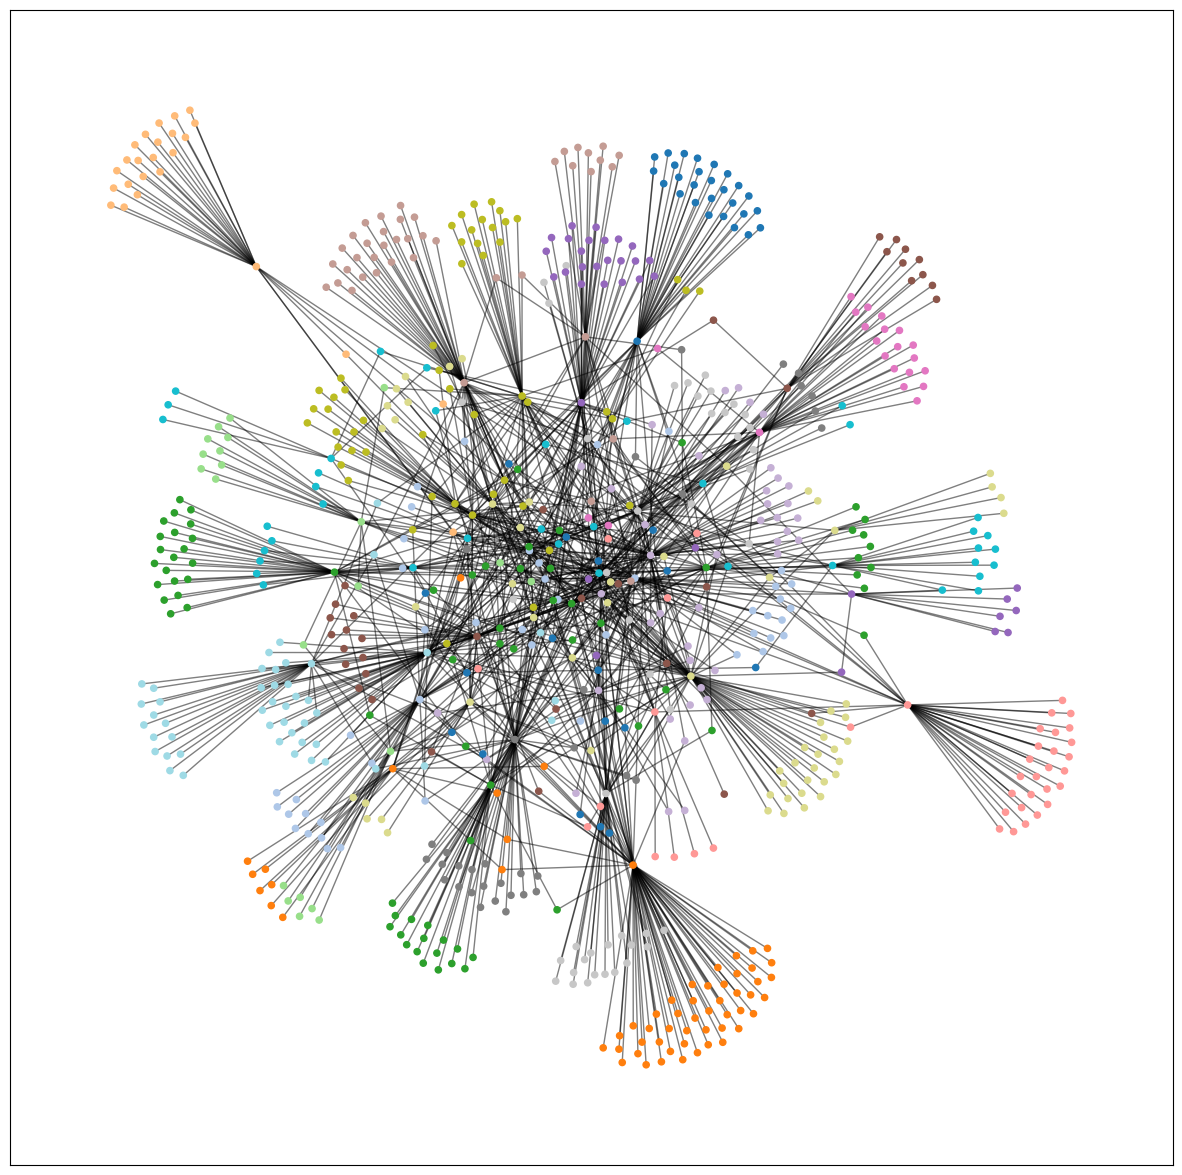

In [55]:
# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('tab20', max(partition_library.values()) + 1)
plt.figure(figsize=(15,15))

nx.draw_networkx_nodes(G, pos, partition_library.keys(), node_size=20,
                       cmap=cmap, node_color=list(partition_library.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.savefig('graphs/jazz_netowrk_partitioning.png')
plt.show()

In [56]:
comms = set(partition_library.values())
comms


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17}

In [57]:
list_community_sets_library = [ set() for i in range(len(comms)) ]

In [58]:
for n, comm in partition_library.items():
    list_community_sets_library[comm].add(n)

list_community_sets_library[0:2]

[{'Alan Dawson',
  'Art Farmer',
  'Big Maybelle',
  'Bill Berry',
  'Bill Cook',
  'Bunny Berigan',
  'Clifford Brown',
  'David Lynch',
  'Dickie Sims',
  'Doc Pomus',
  'Don Baker',
  'Ella Fitzgerald',
  'Frankie Valli',
  'Freddy Mendelsohn',
  'Gerald Wilson',
  'Harry Allen',
  'Herman Lubinsky',
  'Howard Biggs',
  'Jack Benny',
  'Jack Crown',
  'Jean Bach',
  'Jimmie Lunceford',
  'Jimmy Evans',
  'Jimmy Scott',
  'Joe Adams',
  'Joel Dorn',
  'Johnnie Ray',
  'Josephine Baker',
  'Judy Garland',
  'Julie London',
  'Lem Neal',
  'Little Esther',
  'Little Willie John',
  'Lou Reed',
  'Marty Paich',
  'Mary Ann Fisher',
  'Paul Robeson',
  'Robert Benchley',
  'Snooky Young',
  'Stanley Kay',
  'Sweets Edison',
  'Teddy Reig',
  'Todd Barkan',
  'Tommy LiPuma',
  'Winnie Brown'},
 {'Ahmad Jamal',
  'Al Harewood',
  'Anne Brown',
  'Archie Shepp',
  'Aretha Franklin',
  'Art Tatum',
  'B.B. King',
  'Barbra Streisand',
  'Benny Bailey',
  'Benny Powell',
  'Bill Strumpets',
 

In [59]:
for my_list in [list_community_sets_greedy,  list_community_sets_library]:

    #print("Coverage")
    #print("Coverage", nx_comm.coverage(G, my_list))
    #print("Modularity")
    print("Modularity", nx_comm.modularity(G, my_list, weight='weight'))
    #print("Performance")
    #print("Performance", nx_comm.performance(G, my_list))

    print("---")



Modularity 0.5953734544470682
---
Modularity 0.5982442361087398
---


In [60]:
pairs = []
for i, nod in enumerate(list_community_sets_library):
    print(i,len(nod))
    comm_size = (i,len(nod))
    pairs.append(comm_size)


0 45
1 46
2 61
3 25
4 76
5 22
6 39
7 35
8 42
9 36
10 42
11 22
12 35
13 45
14 53
15 59
16 39
17 47


In [61]:
pairs

[(0, 45),
 (1, 46),
 (2, 61),
 (3, 25),
 (4, 76),
 (5, 22),
 (6, 39),
 (7, 35),
 (8, 42),
 (9, 36),
 (10, 42),
 (11, 22),
 (12, 35),
 (13, 45),
 (14, 53),
 (15, 59),
 (16, 39),
 (17, 47)]

In [62]:
community_index = []
number_of_nodes = []

for comm, n_nodes in pairs:
    community_index.append(str(comm))
    number_of_nodes.append(n_nodes)

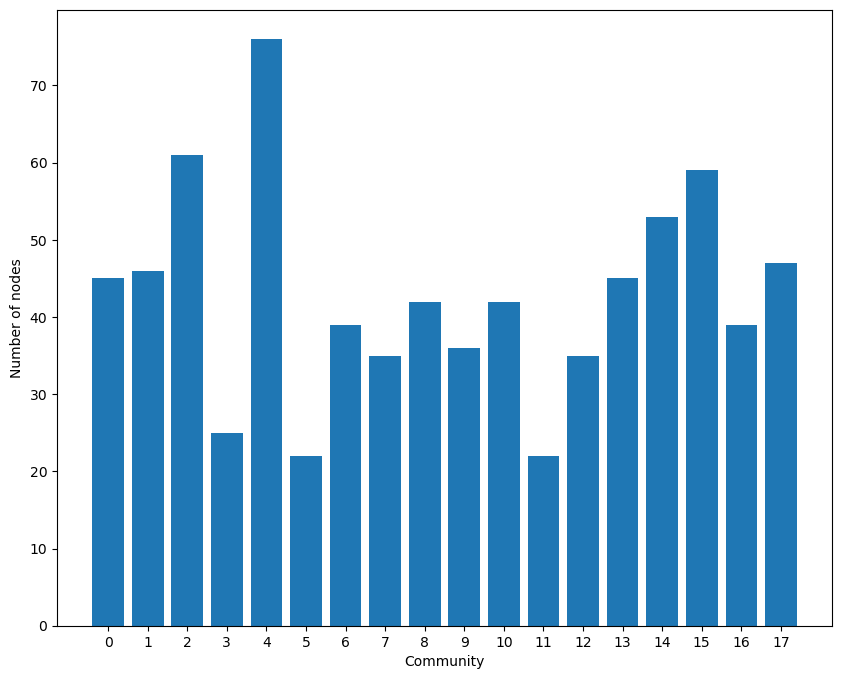

In [63]:
plt.figure(figsize=(10,8))
plt.bar(community_index,number_of_nodes)
plt.xlabel("Community")
plt.ylabel("Number of nodes")
plt.savefig('graphs/numeber_node_partitioning.png')